<a href="https://colab.research.google.com/github/steve-shim/dlgom/blob/main/python/SQL_vs_%ED%8C%90%EB%8B%A4%EC%8A%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
path = '/content/drive/MyDrive/Colab Notebooks/dataset'

In [3]:
import pandas as pd

df = pd.read_csv(path+'/emp.csv')
df

,empno,ename,job,mgr,hiredate,sal,comm,deptno
0,7839,KING,PRESIDENT,NaN,1981-11-17,5000,NaN,10
1,7698,BLAKE,MANAGER,7839.0,1981-05-01,2850,NaN,30
2,7782,CLARK,MANAGER,7839.0,1981-05-09,2450,NaN,10
3,7566,JONES,MANAGER,7839.0,1981-04-01,2975,NaN,20
4,7654,MARTIN,SALESMAN,7698.0,1981-09-10,1250,1400.0,30
5,7499,ALLEN,SALESMAN,7698.0,1981-02-11,1600,300.0,30
6,7844,TURNER,SALESMAN,7698.0,1981-08-21,1500,0.0,30
7,7900,JAMES,CLERK,7698.0,1981-12-11,950,NaN,30
8,7521,WARD,SALESMAN,7698.0,1981-02-23,1250,500.0,30
9,7902,FORD,ANALYST,7566.0,1981-12-11,3000,NaN,20


In [4]:
df2 = pd.read_csv(path+'/dept.csv')
df2

,deptno,dname,loc
0,10,ACCOUNTING,NEW YORK
1,20,RESEARCH,DALLAS
2,30,SALES,CHICAGO
3,40,OPERATIONS,BOSTON


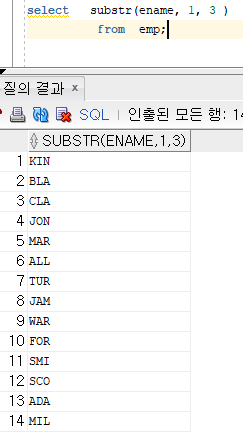

In [5]:
df['ename'].str[:3]

0     KIN
1     BLA
2     CLA
3     JON
4     MAR
5     ALL
6     TUR
7     JAM
8     WAR
9     FOR
10    SMI
11    SCO
12    ADA
13    MIL
Name: ename, dtype: object

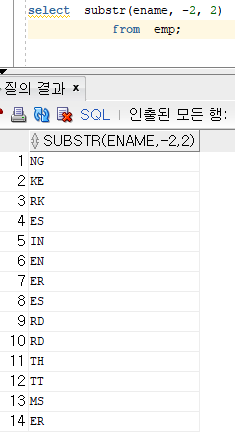

In [6]:
df['ename'].str[-2:]

0     NG
1     KE
2     RK
3     ES
4     IN
5     EN
6     ER
7     ES
8     RD
9     RD
10    TH
11    TT
12    MS
13    ER
Name: ename, dtype: object

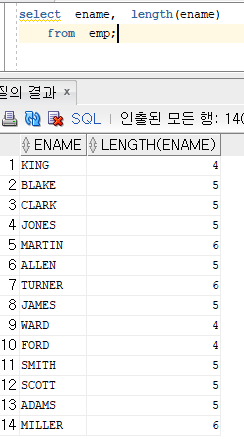

In [7]:
df1 = pd.concat([df['ename'], df['ename'].str.len()], axis=1)
df1.columns = ['ename', 'length(ename)']
df1

,ename,length(ename)
0,KING,4
1,BLAKE,5
2,CLARK,5
3,JONES,5
4,MARTIN,6
5,ALLEN,5
6,TURNER,6
7,JAMES,5
8,WARD,4
9,FORD,4


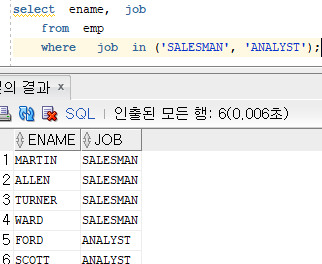

In [8]:
df.loc[df['job'].isin(['SALESMAN','ANALYST']), ['ename','job']]

,ename,job
4,MARTIN,SALESMAN
5,ALLEN,SALESMAN
6,TURNER,SALESMAN
8,WARD,SALESMAN
9,FORD,ANALYST
11,SCOTT,ANALYST


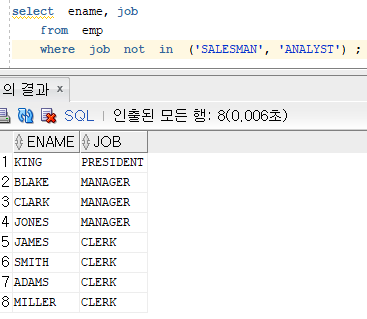

In [9]:
df.loc[~df['job'].isin(['SALESMAN','ANALYST']), ['ename','job']]

,ename,job
0,KING,PRESIDENT
1,BLAKE,MANAGER
2,CLARK,MANAGER
3,JONES,MANAGER
7,JAMES,CLERK
10,SMITH,CLERK
12,ADAMS,CLERK
13,MILLER,CLERK


In [10]:
ndf = pd.merge(df, df2, on='deptno', how='outer')
# 이번엔 outer옵션을 줘서 deptno 기준으로 합치되, 어느한쪽에라도 없는 데이터가 있는 경우 NaN값이 지정된다.
ndf

,empno,ename,job,mgr,hiredate,sal,comm,deptno,dname,loc
0,7839.0,KING,PRESIDENT,NaN,1981-11-17,5000.0,NaN,10,ACCOUNTING,NEW YORK
1,7782.0,CLARK,MANAGER,7839.0,1981-05-09,2450.0,NaN,10,ACCOUNTING,NEW YORK
2,7934.0,MILLER,CLERK,7782.0,1982-01-11,1300.0,NaN,10,ACCOUNTING,NEW YORK
3,7698.0,BLAKE,MANAGER,7839.0,1981-05-01,2850.0,NaN,30,SALES,CHICAGO
4,7654.0,MARTIN,SALESMAN,7698.0,1981-09-10,1250.0,1400.0,30,SALES,CHICAGO
5,7499.0,ALLEN,SALESMAN,7698.0,1981-02-11,1600.0,300.0,30,SALES,CHICAGO
6,7844.0,TURNER,SALESMAN,7698.0,1981-08-21,1500.0,0.0,30,SALES,CHICAGO
7,7900.0,JAMES,CLERK,7698.0,1981-12-11,950.0,NaN,30,SALES,CHICAGO
8,7521.0,WARD,SALESMAN,7698.0,1981-02-23,1250.0,500.0,30,SALES,CHICAGO
9,7566.0,JONES,MANAGER,7839.0,1981-04-01,2975.0,NaN,20,RESEARCH,DALLAS


In [11]:
ndf = ndf.dropna(thresh=4)
# 결측값이 아닌 데이터가 4개는 되야 살리겠다 (3개 이하면 drop)
ndf

,empno,ename,job,mgr,hiredate,sal,comm,deptno,dname,loc
0,7839.0,KING,PRESIDENT,NaN,1981-11-17,5000.0,NaN,10,ACCOUNTING,NEW YORK
1,7782.0,CLARK,MANAGER,7839.0,1981-05-09,2450.0,NaN,10,ACCOUNTING,NEW YORK
2,7934.0,MILLER,CLERK,7782.0,1982-01-11,1300.0,NaN,10,ACCOUNTING,NEW YORK
3,7698.0,BLAKE,MANAGER,7839.0,1981-05-01,2850.0,NaN,30,SALES,CHICAGO
4,7654.0,MARTIN,SALESMAN,7698.0,1981-09-10,1250.0,1400.0,30,SALES,CHICAGO
5,7499.0,ALLEN,SALESMAN,7698.0,1981-02-11,1600.0,300.0,30,SALES,CHICAGO
6,7844.0,TURNER,SALESMAN,7698.0,1981-08-21,1500.0,0.0,30,SALES,CHICAGO
7,7900.0,JAMES,CLERK,7698.0,1981-12-11,950.0,NaN,30,SALES,CHICAGO
8,7521.0,WARD,SALESMAN,7698.0,1981-02-23,1250.0,500.0,30,SALES,CHICAGO
9,7566.0,JONES,MANAGER,7839.0,1981-04-01,2975.0,NaN,20,RESEARCH,DALLAS


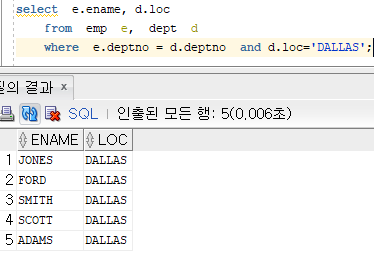

In [12]:
ndf.loc[ndf['loc']=='DALLAS', ['ename','loc']]

,ename,loc
9,JONES,DALLAS
10,FORD,DALLAS
11,SMITH,DALLAS
12,SCOTT,DALLAS
13,ADAMS,DALLAS


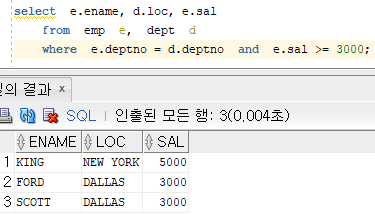

In [13]:
ndf.loc[ndf['sal']>=3000, ['ename','loc','sal']]

,ename,loc,sal
0,KING,NEW YORK,5000.0
10,FORD,DALLAS,3000.0
12,SCOTT,DALLAS,3000.0


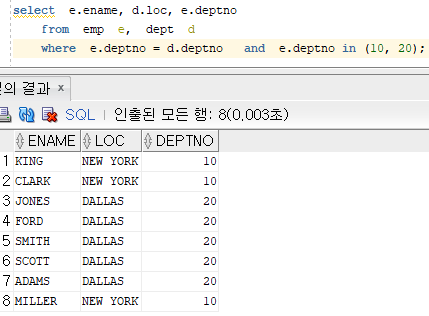

In [14]:
ndf.loc[ndf['deptno'].isin([10,20]), ['ename','loc','deptno']]

,ename,loc,deptno
0,KING,NEW YORK,10
1,CLARK,NEW YORK,10
2,MILLER,NEW YORK,10
9,JONES,DALLAS,20
10,FORD,DALLAS,20
11,SMITH,DALLAS,20
12,SCOTT,DALLAS,20
13,ADAMS,DALLAS,20


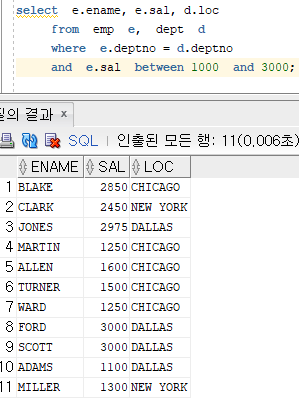

In [15]:
ndf.loc[ndf['sal'].between(1000,3000), ['ename','sal','loc']]

,ename,sal,loc
1,CLARK,2450.0,NEW YORK
2,MILLER,1300.0,NEW YORK
3,BLAKE,2850.0,CHICAGO
4,MARTIN,1250.0,CHICAGO
5,ALLEN,1600.0,CHICAGO
6,TURNER,1500.0,CHICAGO
8,WARD,1250.0,CHICAGO
9,JONES,2975.0,DALLAS
10,FORD,3000.0,DALLAS
12,SCOTT,3000.0,DALLAS


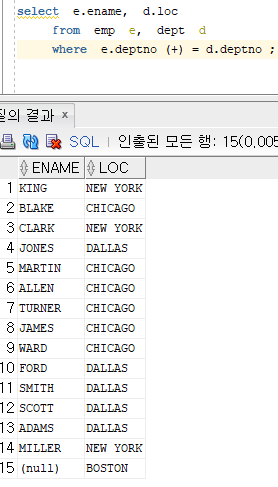

In [16]:
pd.merge(df, df2, on='deptno', how='right')[['ename','loc']]

,ename,loc
0,KING,NEW YORK
1,CLARK,NEW YORK
2,MILLER,NEW YORK
3,JONES,DALLAS
4,FORD,DALLAS
5,SMITH,DALLAS
6,SCOTT,DALLAS
7,ADAMS,DALLAS
8,BLAKE,CHICAGO
9,MARTIN,CHICAGO


### 월급이 1000 에서 3000 사이가 아닌 사원들의 이름과 월급을 출력하시오 !  

In [17]:
df.loc[~(df['sal']>1000)&(df['sal']<3000) ,['ename','sal']]

,ename,sal
7,JAMES,950
10,SMITH,800


### 직업이 CLERK, SALESMAN 인 사원들의 이름과 직업 월급을 출력하고 월급으로 정렬하시오!

In [18]:
df.loc[df['job'].isin(['CLERK','SALESMAN']) ,['ename','job','sal']].sort_values(by='sal',ascending=False)

,ename,job,sal
5,ALLEN,SALESMAN,1600
6,TURNER,SALESMAN,1500
13,MILLER,CLERK,1300
4,MARTIN,SALESMAN,1250
8,WARD,SALESMAN,1250
12,ADAMS,CLERK,1100
7,JAMES,CLERK,950
10,SMITH,CLERK,800


### 커미션이 null 이 아닌 사원들의 이름과 커미션을 출력하시오 !

In [19]:
df.loc[~df['comm'].isna() ,['ename','comm']]

,ename,comm
4,MARTIN,1400.0
5,ALLEN,300.0
6,TURNER,0.0
8,WARD,500.0


### 이름의 첫번째 철자가 S 로 시작하는 사원들의 이름을 출력하시오 !

In [20]:
df.loc[df['ename'].str.startswith('S') ,['ename']]

,ename
10,SMITH
11,SCOTT


### 이름의 끝글자가 T 로 끝나는 사원들의 이름을 출력하시오 !

In [21]:
df.loc[df['ename'].str.endswith('T') ,['ename']]

,ename
11,SCOTT


### 이름의 두번째 철자가 M 인 사원의 이름을 출력하시오

In [22]:
df.loc[df['ename'].str[1:2]=='M' ,['ename']]

,ename
10,SMITH


In [23]:
df.loc[df['ename'].str[1:2].str.lower()=='m' ,['ename']]

,ename
10,SMITH
